In [22]:
import datetime as dt
print(dt.datetime.now())

2020-05-19 22:05:47.592121


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [24]:
df_confirmed_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/C" +
                                 "OVID-19/master/csse_covid_19_data/csse_covid_19_ti" +
                                 "me_series/time_series_covid19_confirmed_global.csv")
df_recovered_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVI" +
                                 "D-19/master/csse_covid_19_data/csse_covid_19_time_ser" +
                                 "ies/time_series_covid19_recovered_global.csv")
df_death_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/" +
                             "master/csse_covid_19_data/csse_covid_19_time_series/time_s" +
                             "eries_covid19_deaths_global.csv")

In [25]:
df_confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,856,868,872,876,880,898,916,933,946,948
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,754,755,755,758,760,761,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,43,45,45,45,45,48,48,48,48,50


In [26]:
df_recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,502,558,558,610,648,691,745,745,778,801
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,627,650,654,682,688,694,705,714,715,727
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2546,2678,2841,2998,3058,3158,3271,3409,3507,3625
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,545,550,550,568,576,596,604,615,617,624
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,13,13,13,13,14,14,17,17,17,17


In [27]:
df_death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,115,120,122,127,132,136,153,168,169,173
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,494,502,507,515,522,529,536,542,548,555
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,48,48,48,48,49,49,49,51,51,51
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,3


In [28]:
start_date = '1/22/20'
# Needed because of daily updates on database which cannot be updated yet
# where the date of "today" has not been updated.
# So, for practicity, we get one day before. We could get the last column as well.
end_date = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%-m/%d/%y')

In [29]:
df_top10 = df_confirmed_cases.groupby(['Country/Region']).sum()
df_top10 = df_top10.loc[:, start_date:end_date]
df_top10 = df_top10.sort_values(by=[end_date]).tail(10)

In [30]:
df_top10

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Iran,0,0,0,0,0,0,0,0,0,0,...,106220,107603,109286,110767,112725,114533,116635,118392,120198,122492
Turkey,0,0,0,0,0,0,0,0,0,0,...,137115,138657,139771,141475,143114,144749,146457,148067,149435,150593
Germany,0,0,0,0,0,1,4,4,4,5,...,171324,171879,172576,173171,174098,174478,175233,175752,176369,176551
France,0,0,2,3,3,3,4,5,5,5,...,176782,177094,177547,178349,178184,178994,179630,179630,179693,180051
Italy,0,0,0,0,0,0,0,0,0,2,...,218268,219070,219814,221216,222104,223096,223885,224760,225435,225886
Spain,0,0,0,0,0,0,0,0,0,0,...,223578,224350,227436,228030,228691,229540,230183,230698,230698,231606
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,216525,220449,224332,227741,230985,234440,238004,241461,244995,247709
Brazil,0,0,0,0,0,0,0,0,0,0,...,156061,162699,169594,178214,190137,203165,220291,233511,241080,255368
Russia,0,0,0,0,0,0,0,0,0,2,...,198676,209688,221344,232243,242271,252245,262843,272043,281752,290678


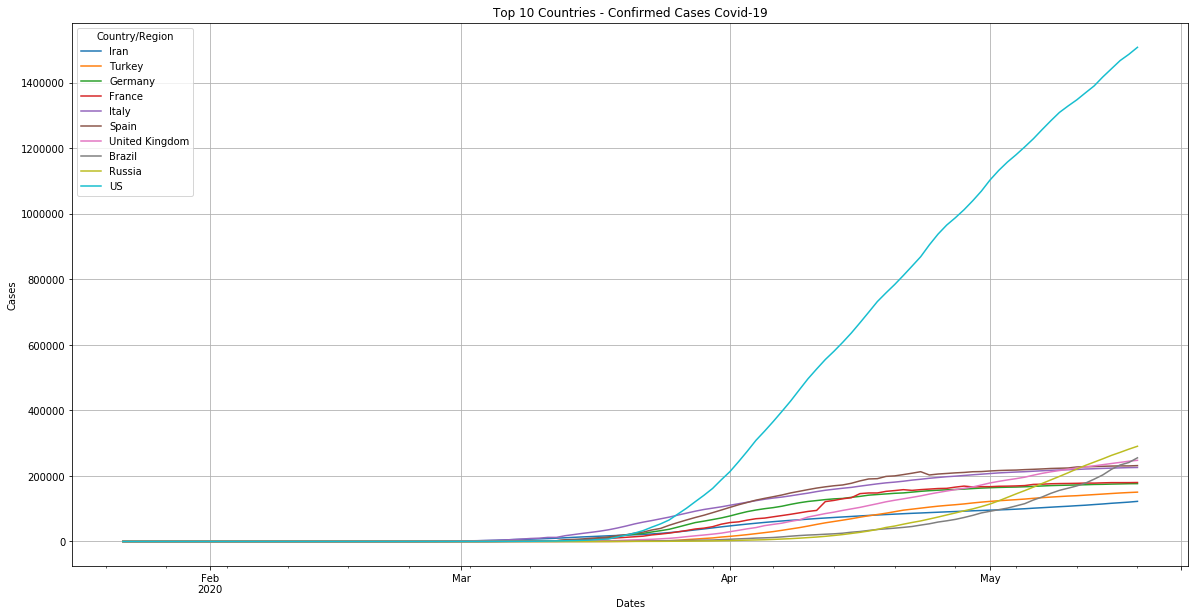

In [31]:
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1,1,1)
df_top10 = df_top10.T
df_top10.index = pd.to_datetime(df_top10.index)
df_top10.plot(ax=ax, legend=True)
ax.set_title("Top 10 Countries - Confirmed Cases Covid-19", fontsize=12)
ax.grid(True)
ax.set(xlabel='Dates', ylabel="Cases");

Extracting data from recovered cases of Top 10 Countries with confirmed cases.

In [32]:
top10_countries = df_top10.columns.tolist() # Name of contries inside top 10
# Searching recovered cases with the top10 countries name.
df_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(top10_countries)]
df_recovered = df_recovered.groupby(['Country/Region']).sum()
df_recovered = df_recovered.loc[:, start_date:end_date]
df_recovered = df_recovered.sort_values(by=[end_date]).tail(10)

In [33]:
df_recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,1001,1002,1015,1023,1032,1043,1047,1058,1058,1090
France,0,0,0,0,0,0,0,0,0,0,...,56148,56327,56835,57898,58786,59719,60562,60562,61327,61843
Russia,0,0,0,0,0,0,0,0,0,0,...,31916,34306,39801,43512,48003,53530,58226,63166,67373,70209
Iran,0,0,0,0,0,0,0,0,0,0,...,85064,86143,87422,88357,89428,90539,91836,93147,94464,95661
Brazil,0,0,0,0,0,0,0,0,0,0,...,61685,64957,67384,72597,78424,79479,84970,89672,94122,100459
Turkey,0,0,0,0,0,0,0,0,0,0,...,89480,92691,95780,98889,101715,104030,106133,108137,109962,111577
Italy,0,0,0,0,0,0,0,0,0,0,...,103031,105186,106587,109039,112541,115288,120205,122810,125176,127326
Spain,0,0,0,0,0,0,0,0,0,0,...,133952,136166,137139,138980,140823,143374,144783,146446,146446,150376
Germany,0,0,0,0,0,0,0,0,0,0,...,143300,144400,145617,147200,148700,150300,151597,152600,154011,155041


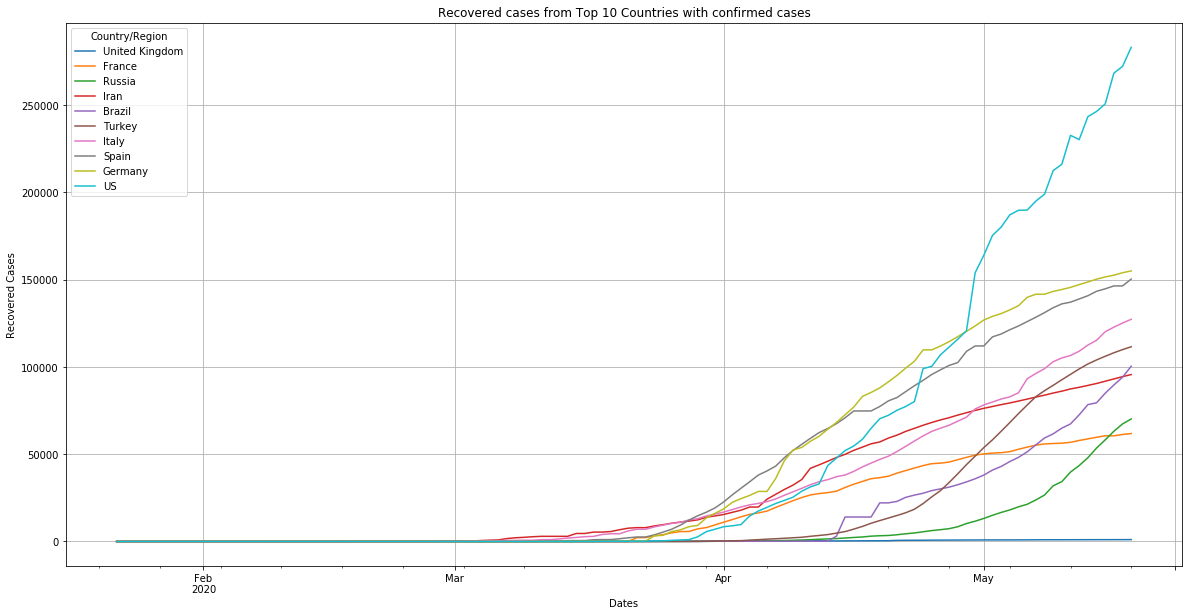

In [34]:
fig = plt.figure(figsize = (20, 10))
ax_2 = fig.add_subplot(1,1,1)
df_recovered = df_recovered.T
df_recovered.index = pd.to_datetime(df_recovered.index)
df_recovered.plot(ax=ax_2, legend=True)
ax_2.set_title("Recovered cases from Top 10 Countries with confirmed cases", fontsize=12)
ax_2.grid(True)
ax_2.set(xlabel='Dates', ylabel='Recovered Cases');

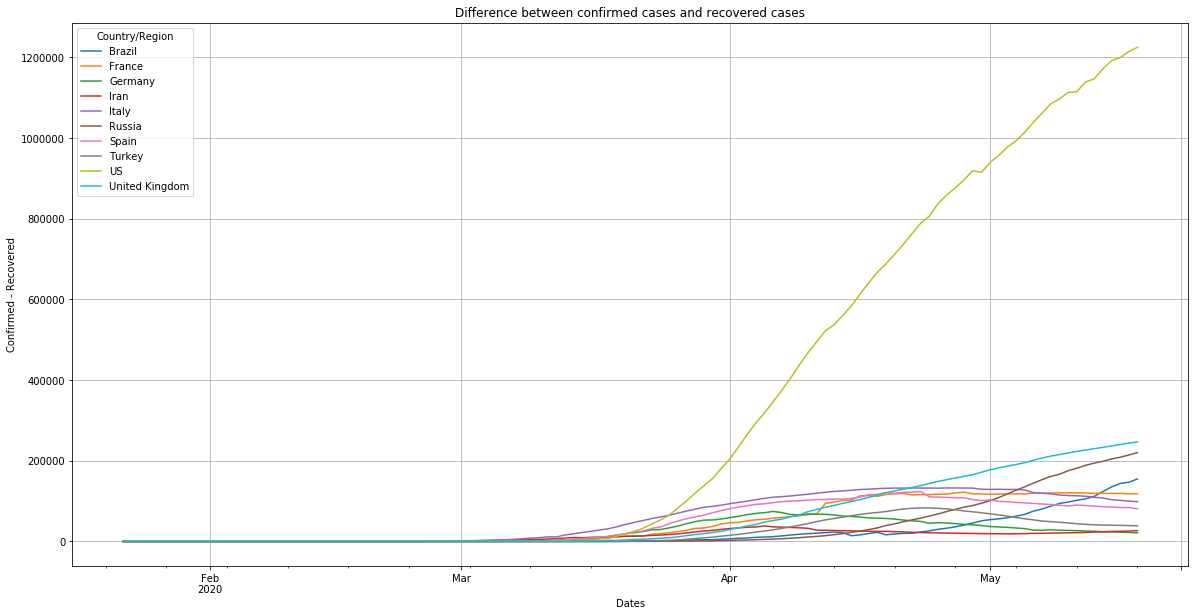

In [35]:
fig = plt.figure(figsize = (20, 10))
ax_3 = fig.add_subplot(1,1,1)
df_diff = df_top10 - df_recovered
df_diff.plot(ax=ax_3, legend=True)
ax_3.set_title("Difference between confirmed cases and recovered cases", fontsize=12)
ax_3.grid(True)
ax_3.set(xlabel='Dates', ylabel='Confirmed - Recovered');

In [36]:
df_death = df_death_cases.loc[df_death_cases['Country/Region'].isin(top10_countries)]
df_death = df_death.groupby(['Country/Region']).sum()
df_death = df_death.loc[:, start_date:end_date]
df_death = df_death.sort_values(by=[end_date]).tail(10)

In [37]:
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Russia,0,0,0,0,0,0,0,0,0,0,...,1827,1915,2009,2116,2212,2305,2418,2537,2631,2722
Turkey,0,0,0,0,0,0,0,0,0,0,...,3739,3786,3841,3894,3952,4007,4055,4096,4140,4171
Iran,0,0,0,0,0,0,0,0,0,0,...,6589,6640,6685,6733,6783,6854,6902,6937,6988,7057
Germany,0,0,0,0,0,0,0,0,0,0,...,7549,7569,7661,7738,7861,7884,7897,7938,7962,8003
Brazil,0,0,0,0,0,0,0,0,0,0,...,10656,11123,11653,12461,13240,13999,14962,15662,16118,16853
Spain,0,0,0,0,0,0,0,0,0,0,...,26478,26621,26744,26920,27104,27321,27459,27563,27563,27709
France,0,0,0,0,0,0,0,0,0,0,...,26313,26383,26646,26994,27077,27428,27532,27532,28111,28242
Italy,0,0,0,0,0,0,0,0,0,0,...,30395,30560,30739,30911,31106,31368,31610,31763,31908,32007
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,31662,31930,32141,32769,33264,33693,34078,34546,34716,34876


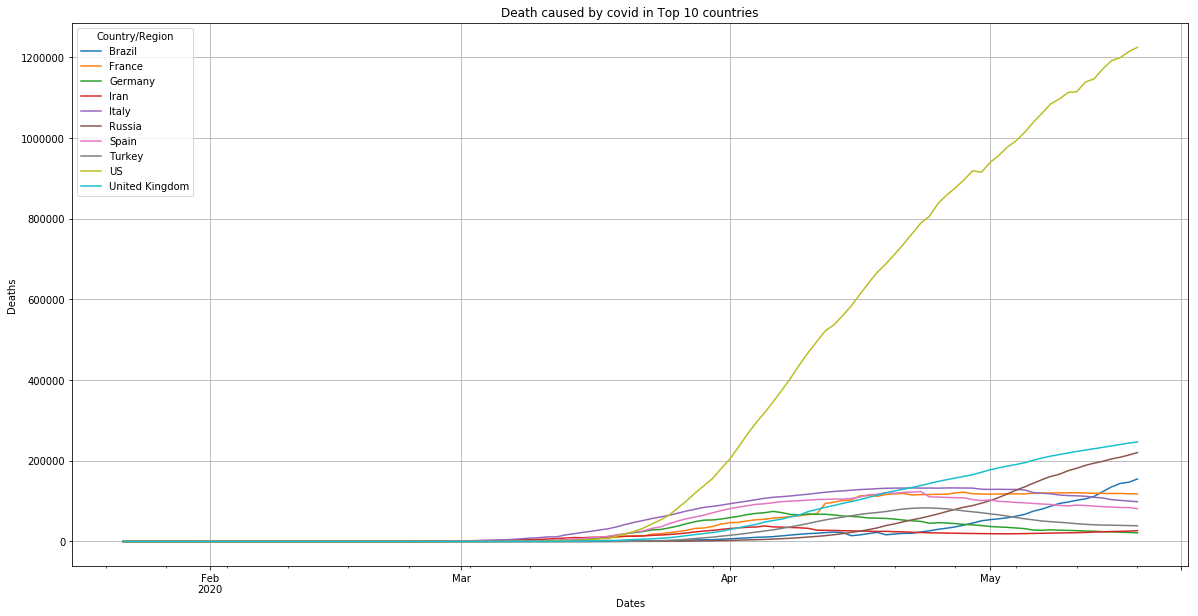

In [38]:
fig = plt.figure(figsize = (20, 10))
ax_4 = fig.add_subplot(1,1,1)
df_diff.plot(ax=ax_4, legend=True)
ax_4.set_title("Death caused by covid in Top 10 countries", fontsize=12)
ax_4.grid(True)
ax_4.set(xlabel='Dates', ylabel='Deaths');

Active cases (Confirmed Cases - (Recovered + Deaths))

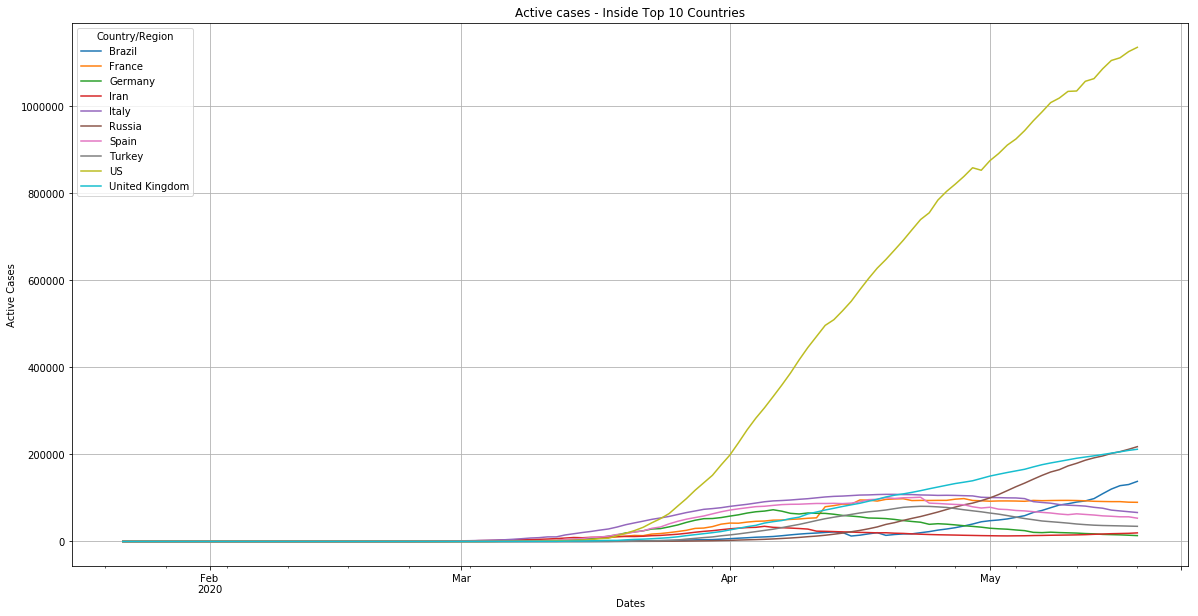

In [39]:
fig = plt.figure(figsize = (20, 10))
ax_5 = fig.add_subplot(1,1,1)
df_death = df_death.T
df_death.index = pd.to_datetime(df_death.index)
df_active = (df_top10 - (df_recovered + df_death))
df_active.plot(ax=ax_5, legend=True)
ax_5.set_title("Active cases - Inside Top 10 Countries", fontsize=12)
ax_5.grid(True)
ax_5.set(xlabel='Dates', ylabel='Active Cases');

Brazil Study


In [40]:
df_brazil_confirmed = df_confirmed_cases.loc[df_confirmed_cases['Country/Region'].isin(['Brazil'])]

In [41]:
df_brazil_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,156061,162699,169594,178214,190137,203165,220291,233511,241080,255368


In [42]:
df_brazil_recovered = df_recovered_cases.loc[df_recovered_cases['Country/Region'].isin(['Brazil'])]

In [43]:
df_brazil_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
29,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,61685,64957,67384,72597,78424,79479,84970,89672,94122,100459


In [47]:
df_brazil_deaths = df_death_cases.loc[df_death_cases['Country/Region'].isin(['Brazil'])]

In [48]:
df_brazil_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,...,10656,11123,11653,12461,13240,13999,14962,15662,16118,16853


In [50]:
df_brazil_confirmed = df_brazil_confirmed.loc[:,start_date:end_date].T
df_brazil_confirmed.index = pd.to_datetime(df_brazil_confirmed.index)

df_brazil_recovered = df_brazil_recovered.loc[:,start_date:end_date].T
df_brazil_recovered.index = pd.to_datetime(df_brazil_recovered.index)

df_brazil_deaths = df_brazil_deaths.loc[:,start_date:end_date].T
df_brazil_deaths.index = pd.to_datetime(df_brazil_deaths.index)

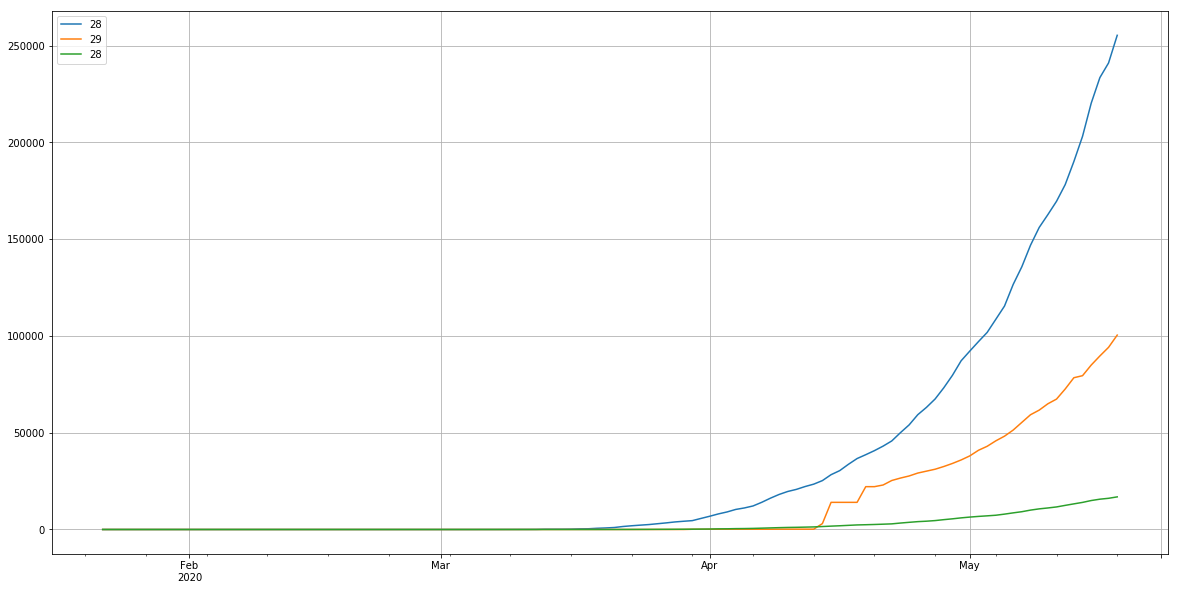

In [54]:
fig = plt.figure(figsize = (20, 10))
ax_6 = fig.add_subplot(1,1,1)

df_brazil_confirmed.plot(ax=ax_6, legend=True)
df_brazil_recovered.plot(ax=ax_6, legend=True)
df_brazil_deaths.plot(ax=ax_6, legend=True)
ax_6.grid(True)